In [23]:
import csv
import random
from datetime import datetime as DT
from datetime import timedelta

operations = ['Кредит', "Взнос", "Вклад", "Перевод", "Штраф", "Налог"]


def get_random_date(start, end):
    delta = end - start
    return start + timedelta(random.randint(0, delta.days))


start_dt = DT.strptime('01.01.2023', '%d.%m.%Y')
end_dt = DT.strptime('01.06.2023', '%d.%m.%Y')


summa = [i for i in range(0, 100000+1)]


with open('data.csv', 'w+', encoding='UTF-8') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerow(['Тип', 'Дата', 'Сумма'])
    for i in range(6000):
        town = random.choice(operations)
        press = random.choice(summa)
        writer.writerow([town, get_random_date(start_dt, end_dt), press])

In [4]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# чтение файла и вывод первых пяти его строк
df = pd.read_csv('data.csv')
df.head()

,Тип,Дата,Сумма
0,Взнос,2023-04-02 00:00:00,81017
1,Взнос,2023-01-06 00:00:00,75665
2,Налог,2023-03-02 00:00:00,52859
3,Взнос,2023-05-24 00:00:00,85368
4,Штраф,2023-04-27 00:00:00,61739


In [39]:
# описание
df.describe()

,Сумма
count,6000.000000
mean,49292.873833
std,28903.188993
min,9.000000
25%,24221.750000
50%,48859.500000
75%,74189.000000
max,99999.000000


In [40]:
# информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Тип     6000 non-null   object
 1   Дата    6000 non-null   object
 2   Сумма   6000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 140.8+ KB


In [27]:
# очистка от мусора
df_2 = df[df['Сумма'] > 0]
df_2

,Тип,Дата,Сумма
0,Перевод,2023-04-14 00:00:00,25486
1,Налог,2023-05-31 00:00:00,45581
2,Взнос,2023-01-22 00:00:00,97342
3,Вклад,2023-04-02 00:00:00,506
4,Перевод,2023-02-02 00:00:00,95173
...,...,...,...
5995,Перевод,2023-01-01 00:00:00,72200
5996,Налог,2023-05-21 00:00:00,57208
5997,Налог,2023-01-12 00:00:00,28013
5998,Кредит,2023-02-22 00:00:00,1357


In [36]:
df_2['Сумма'].min()

9

In [29]:
df_2['Сумма'].max()

99999

In [30]:
# поиск среднего
df_2['Сумма'].mean() 

49292.87383333333

In [31]:
df_2['Сумма'].sum()

295757243

In [37]:
len(df_2['Сумма'].unique())

5817

In [33]:
# получение номера месяца из даты
df_2['Месяц'] = pd.DatetimeIndex(df_2['Дата']).month
df_2

,Тип,Дата,Сумма,Месяц
0,Перевод,2023-04-14 00:00:00,25486,4
1,Налог,2023-05-31 00:00:00,45581,5
2,Взнос,2023-01-22 00:00:00,97342,1
3,Вклад,2023-04-02 00:00:00,506,4
4,Перевод,2023-02-02 00:00:00,95173,2
...,...,...,...,...
5995,Перевод,2023-01-01 00:00:00,72200,1
5996,Налог,2023-05-21 00:00:00,57208,5
5997,Налог,2023-01-12 00:00:00,28013,1
5998,Кредит,2023-02-22 00:00:00,1357,2


In [34]:
# добавление столбца
df_2["Комиссионный сбор"] = df_2['Сумма'] * 0.01
df_2

,Тип,Дата,Сумма,Месяц,Комиссионный сбор
0,Перевод,2023-04-14 00:00:00,25486,4,254.86
1,Налог,2023-05-31 00:00:00,45581,5,455.81
2,Взнос,2023-01-22 00:00:00,97342,1,973.42
3,Вклад,2023-04-02 00:00:00,506,4,5.06
4,Перевод,2023-02-02 00:00:00,95173,2,951.73
...,...,...,...,...,...
5995,Перевод,2023-01-01 00:00:00,72200,1,722.00
5996,Налог,2023-05-21 00:00:00,57208,5,572.08
5997,Налог,2023-01-12 00:00:00,28013,1,280.13
5998,Кредит,2023-02-22 00:00:00,1357,2,13.57


<Axes: xlabel='Месяц'>

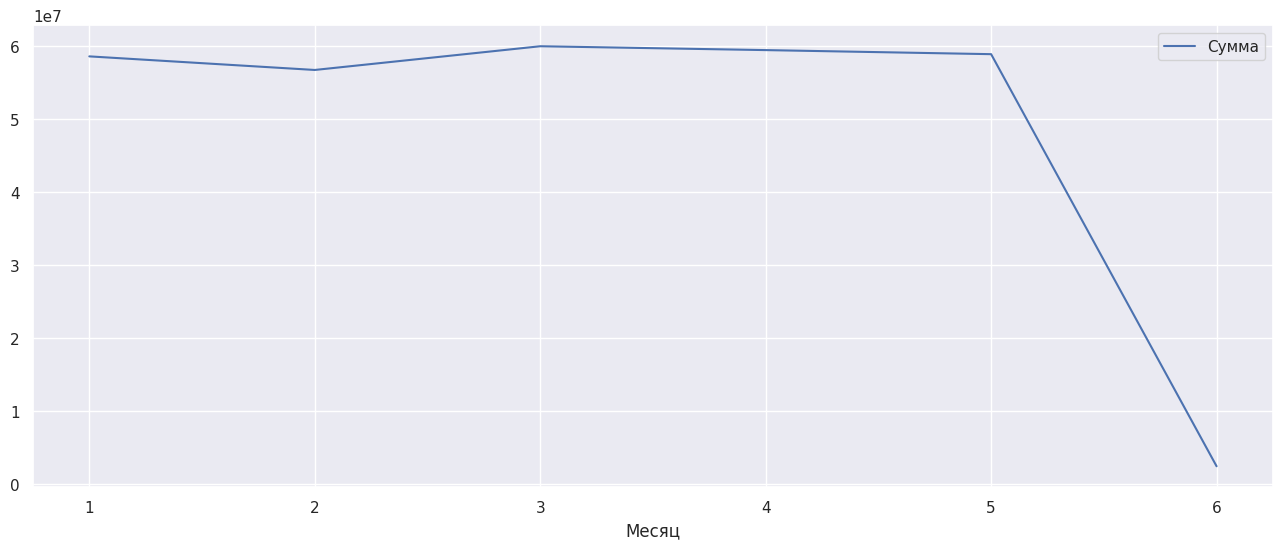

In [38]:
df_revenue = df_2.groupby('Месяц', as_index=False).agg({'Сумма': 'sum'})
sns.set(rc={'figure.figsize': (16, 6)})
df_revenue.plot(x = 'Месяц', y = 'Сумма')

<Axes: xlabel='Месяц'>

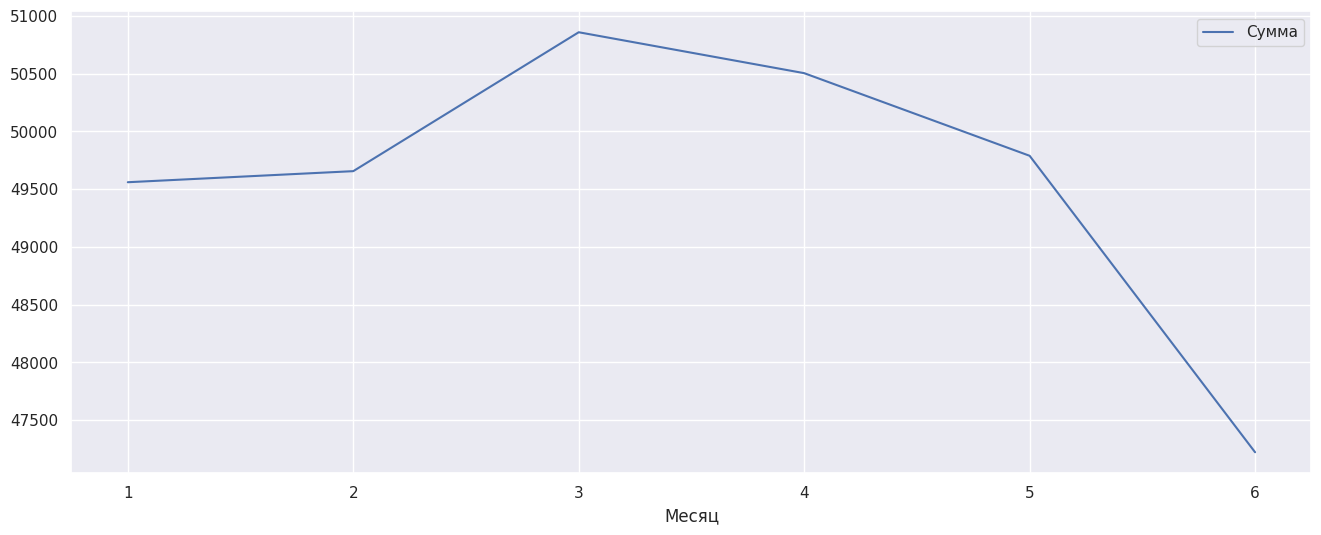

In [18]:
df_revenue = df_2.groupby('Месяц', as_index=False).agg({'Сумма': 'mean'})
sns.set(rc={'figure.figsize': (16, 6)})
df_revenue.plot(x = 'Месяц', y = 'Сумма')

<Axes: xlabel='Месяц'>

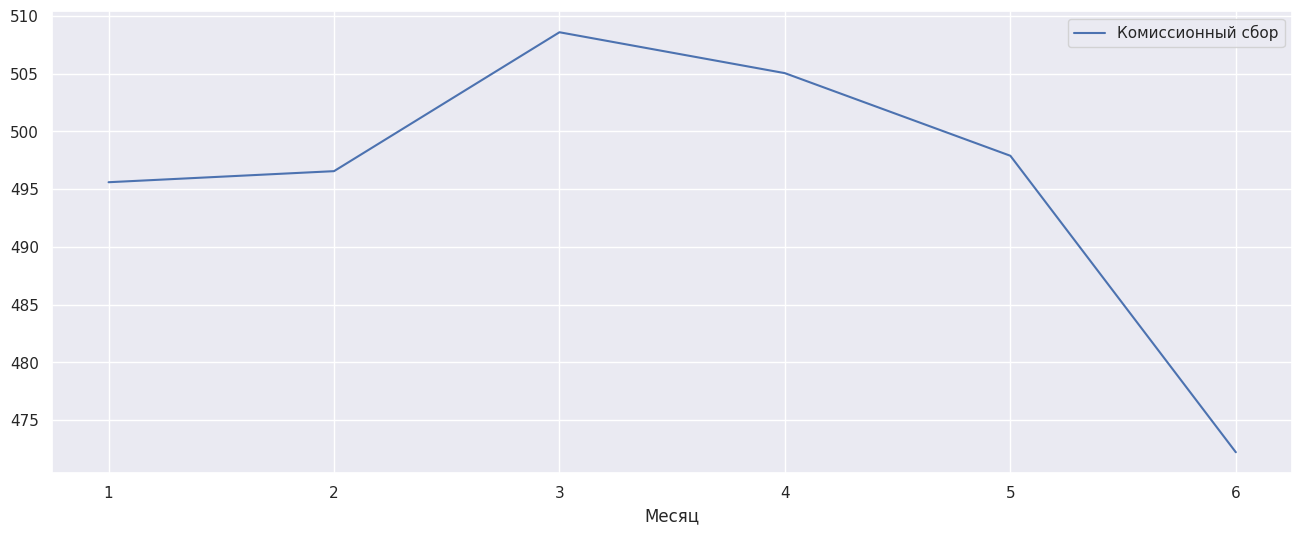

In [19]:
df_revenue = df_2.groupby('Месяц', as_index=False).agg({'Комиссионный сбор': 'mean'})
sns.set(rc={'figure.figsize': (16, 6)})
df_revenue.plot(x = 'Месяц', y = 'Комиссионный сбор')

<Axes: xlabel='Месяц'>

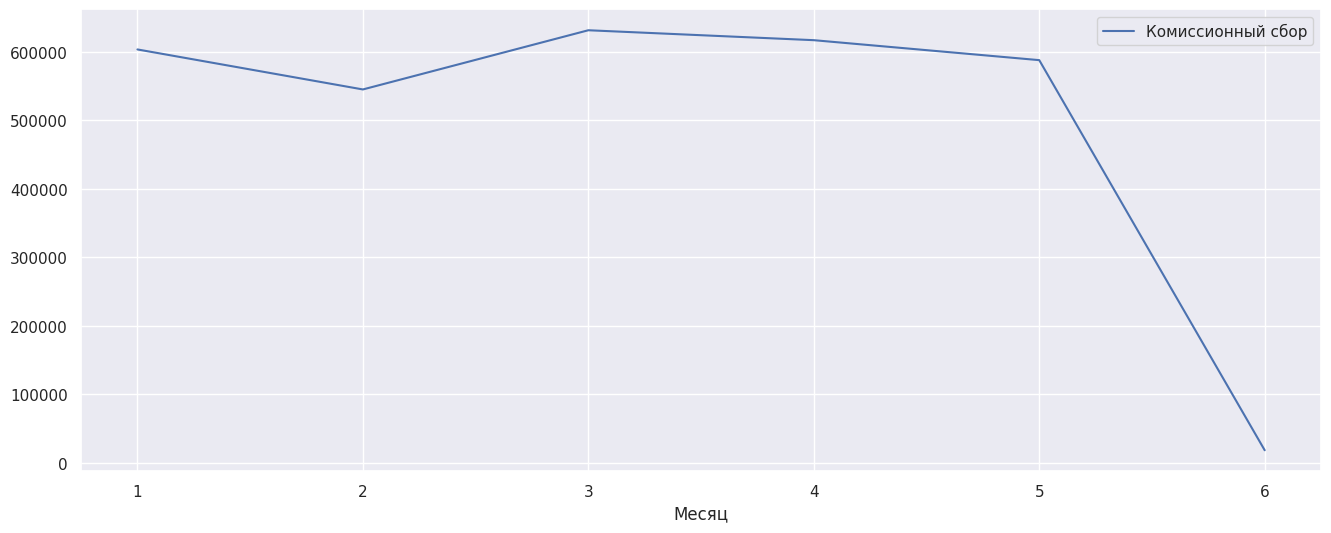

In [20]:
df_revenue = df_2.groupby('Месяц', as_index=False).agg({'Комиссионный сбор': 'sum'})
sns.set(rc={'figure.figsize': (16, 6)})
df_revenue.plot(x = 'Месяц', y = 'Комиссионный сбор')